### Dependencia de la cantidad de entradas vendidas en el cine respecto al valor del boleto

Considerando el mercado cinematográfico de América del Norte (consistente en los Estados Unidos, Canadá, Puerto Rico y Guam), verificar si la  cantidad de boletos de cine depende de su valor.

fuente: https://www.kaggle.com/johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021?select=AnnualTicketSales.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [1]:
# Montar Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Diplomado data science/III. Análisis exploratorio y estadística'
ticket_df = pd.read_csv(path+"/AnnualTicketSales.csv")

ticket_df.head()

NameError: ignored

In [ ]:
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YEAR                                 27 non-null     int64  
 1   TICKETS SOLD                         27 non-null     object 
 2   TOTAL BOX OFFICE                     27 non-null     object 
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object 
 4   AVERAGE TICKET PRICE                 27 non-null     object 
 5   Unnamed: 5                           0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ KB


In [ ]:
# Función para ajustar los parametros de regresión lineal

def rl_coef(x, y):
  x_min_mx = x - np.mean(x)  # x minus mean(x)
  y_min_my = y - np.mean(y)  # y minus mean(y)

  beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
  beta_0 = np.mean(y) - (beta_1 * np.mean(x))

  return beta_1, beta_0

In [ ]:
# Función para aplicar la forma de la regresión lineal

def lin_reg_coef(x, beta_1, beta_0): 
    y_hat = (beta_1 * x) + beta_0  
    return y_hat

In [ ]:
# Función para obtener MAPE

def mean_absolute_percentage_error(y, y_hat):
  mape = np.sum(np.abs((y - y_hat)/y)) / len(y)
  return mape

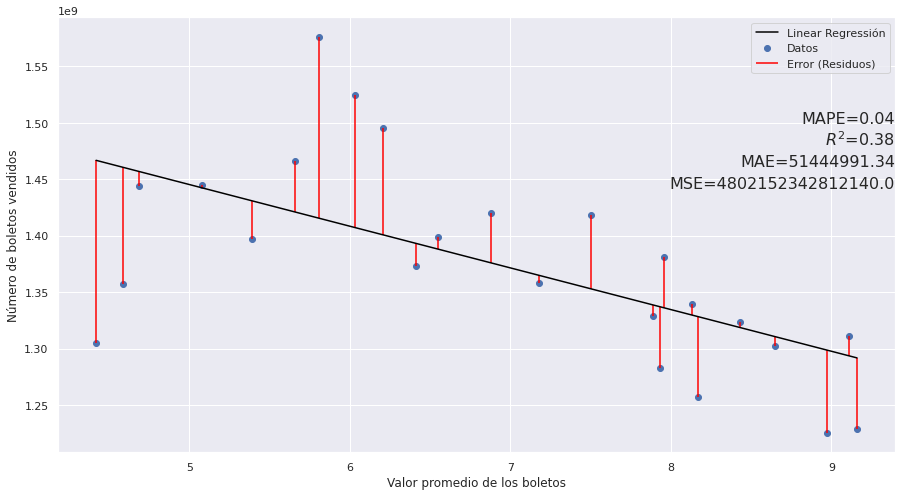

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

y_mod = ticket_df['TICKETS SOLD'].values
x_mod = ticket_df['AVERAGE TICKET PRICE'].values
x_d = []
y_d = []

# Cambiar formato de datos a número para trabajar en ellos
for i in range(2,len(x_mod)-1):
   x_d.append(float(x_mod[i].replace("$","")))

for i in range(2,len(y_mod)-1):
   y_d.append(int(y_mod[i].replace(",","")))

# Cambiar tipo de dato a <class 'numpy.ndarray'>
y= (np.asarray(y_d)).flatten()
x= (np.asarray(x_d)).flatten()

beta_1, beta_0 = rl_coef(x, y)


fig, ax = plt.subplots(1,1, figsize=(15,8))
ax.plot(x,lin_reg_coef(x, beta_1,beta_0), color="black", label="Linear Regressión") 
ax.scatter(x,y, label="Datos")

ax
ax.vlines(x, y, lin_reg_coef(x, beta_1,beta_0), color="red", label="Error (Residuos)") #Gráficamos los Errores en cada punto. 
plt.ylabel('Número de boletos vendidos')
plt.xlabel('Valor promedio de los boletos')

mse = mean_squared_error(y , lin_reg_coef(x, beta_1,beta_0)) 
mae = mean_absolute_error(y , lin_reg_coef(x, beta_1,beta_0)) 
r2= r2_score(y , lin_reg_coef(x, beta_1,beta_0))
mape = mean_absolute_percentage_error(y , lin_reg_coef(x, beta_1,beta_0)) 

plt.annotate(s = f'MSE={np.round(mse,2)}', xy = (1,1), 
             xytext = (1,0.6), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)
plt.annotate(s = f'MAE={np.round(mae,2)}', xy = (1,1), 
             xytext = (1,0.65), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)
plt.annotate(s = f'$R^2$={np.round(r2,2)}', xy = (1,1), 
             xytext = (1,0.7), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)
plt.annotate(s = f'MAPE={np.round(mape,2)}', xy = (1,1), 
             xytext = (1,0.75), xycoords = "axes fraction", ha="right", va="bottom", fontsize=16)

plt.legend()
plt.show()


Conclusiones:

* Con $R^2$ = 0.38 , es decir, considerando una regresión lineal simple, ésta es capaz de explicar el 38% de la variabilidad del comportamiento del número de boletos vendidos.
* Dado que el MAPE es 0.04, existe en promedio un 4% de error entre el valor real y el estimado (importante considerar que MAPE se indefine para valores de $y_i = 0$, por lo mismo, no es una métrica comúnmente utilizada).
* MSE es alto debido a valores atípicos que existen en los datos.

Por lo tanto, no se puede concluir que la cantidad de tickets vendidos depende del valor promedio de los boletos.